# Loading libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv("dataset_cleaning1.csv")

In [56]:
df.columns

Index(['Age Group', 'Sexual Orientation', 'Race', 'Living Situation',
       'Household Composition', 'Religious Preference', 'Veteran Status',
       'Employment Status', 'Number Of Hours Worked Each Week',
       'Education Status', 'Mental Illness', 'Intellectual Disability',
       'Autism Spectrum', 'Other Developmental Disability',
       'Alcohol Related Disorder', 'Drug Substance Disorder',
       'Opioid Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Impairment', 'Visual Impairment', 'Speech Impairment',
       'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity',
       'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
       'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
       'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Serious Mental Illness',
     

# Preparing the data for machine learning model

### Handling the UNKNOWN values in the target column

In this part of the project the defined target will be the column 'substance related disorder' that combine the information from three other columns : 'Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder'. In this part of the project it is better to not have "UNKNOWN' values in the target column. So I decided to drop the rows where 'substance related disorder' == 'UNKNOWN'

In [57]:
# Keep the rows with no UNKNOWN attribute in 'susbatnce related disorder'
data = df[df["substance related disorder"] != "UNKNOWN"]
print('before dropping the rows:', df.shape)
print('after dropping the rows:', data.shape)

before dropping the rows: (206612, 53)
after dropping the rows: (198801, 53)


### Handling the UNKNOWN values in the target column

The target column "substance related disorder" was engineered based on three columns 'Alcohol Related Disorder', 'Drug Substance Disorder' and 'Opioid Related Disorder'. So these 3 columns hsould be dropped from the dataset applied to the model. 'Principal Diagnosis Class', 'Additional Diagnosis Class' these two columns also contain information about substance disorders so they also should be dropped

In [58]:
# Define colmuns to drop and apply drop function
col_drop = ['Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder', 'Principal Diagnosis Class', 'Additional Diagnosis Class']
data = data.drop(col_drop, axis = 1)

In [59]:
data.shape

(198801, 48)

### Encoding the data for machine learning

#### Start by splitting the target column from the other features

In [60]:
# Splitting the X and y data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X = df.drop(target_col, axis=1) 
    y = df[target_col]

    return X, y

X, y = split_X_y(data, "substance related disorder")

#### Encoding the features X

In [61]:
X_encod = pd.get_dummies(X, drop_first = True)

In [62]:
X_encod.shape

(198801, 106)

In [63]:
X_encod.head()

,Age Group_CHILD,Sexual Orientation_STRAIGHT,Sexual Orientation_UNKNOWN,Race_MULTI-RACIAL,Race_OTHER,Race_UNKNOWN RACE,Race_WHITE ONLY,Living Situation_INSTITUTIONAL SETTING,Living Situation_OTHER LIVING SITUATION,Living Situation_PRIVATE RESIDENCE,...,Financial aid or insurance_YES,Gender_MALE,Gender_NON-BINARY,Gender_TRANSGENDER FEMALE,Gender_TRANSGENDER MALE,Gender_UNKNOWN,Smoke(d)_UNKNOWN,Smoke(d)_YES,Cannabis use_UNKNOWN,Cannabis use_YES
0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0


#### Replace the 'YES', 'NO' into 0 and 1
Knowing that there is no unknown left in the target column I can ony use 0 and 1

In [64]:
y_encod = y.replace({'NO': 0, 'YES': 1})

#### Replace the 'YES', 'NO' into 0 and 1
Cocatenate the X and y in the same table

In [65]:
data_encod = pd.concat([X_encod, y_encod], axis=1)

In [66]:
data_encod.shape

(198801, 107)

### Evaluating the balance between 'Yes' and 'No' attributes in target column

In [67]:
category_No = data_encod[data_encod["substance related disorder"] == 0]
category_Yes = data_encod[data_encod["substance related disorder"] == 1]
print(category_No.shape)
print('')
print(category_Yes.shape)

(163185, 107)

(35616, 107)


We can see that there is an imbalance between the 'YES' and 'NO' attributes in this dataset. We need to handle the imbalance. We will fo this after splitting the data in order to protect the test data from leakage

# Splitting test and train

In [68]:
# Split the dataframe bewteen train and test before upsampling on the train

def split_data(data, test_size=0.2, random_state=42):

    data_train, data_test = train_test_split(data, test_size=test_size, random_state=random_state)
    
    return data_train, data_test

data_train, data_test = split_data(data_encod)

In [69]:
# Check the inbalance in the train data
category_0 = data_train[data_train["substance related disorder"] == 0]
category_1 = data_train[data_train["substance related disorder"] == 1]

print(category_0.shape)
print('')
print(category_1.shape)

(130614, 107)

(28426, 107)


In [70]:
# Check the inbalance in the test data
test_0 = data_test[data_test["substance related disorder"] == 0]
test_1 = data_test[data_test["substance related disorder"] == 1]

print(test_0.shape)
print('')
print(test_1.shape)

(32571, 107)

(7190, 107)


# Downsampling on the train data

In [71]:
# downsample the majority class to the size of the positive class using pandas sample method
c1_len = 28426
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(28426, 107)
(28426, 107)


In [72]:
# Regroup the data together category_0_down and category_1
data_train_down = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data_train_down = data_train_down .sample(frac=1)
print('shape after downsampling and concatenating the tables: ', data_train_down.shape)

shape after downsampling and concatenating the tables:  (56852, 107)


# Splitting X and y from train and test data

In [73]:
# Splitting the train data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X_train = df.drop(target_col, axis=1) #predictive variables
    y_train = df[target_col] #predicted varuable

    return X_train, y_train

X_train, y_train = split_X_y(data_train_down, "substance related disorder")
X_test, y_test = split_X_y(data_test, "substance related disorder")

In [74]:
print ('shape of X_train:', X_train.shape)
print ('')
print ('shape of X_test:', X_test.shape)

shape of X_train: (56852, 106)

shape of X_test: (39761, 106)


***************************************************************************************************************************
# PCA
****************************

[0.22669228 0.08601471 0.04789548 0.04299029 0.04140101 0.0376788
 0.03425024 0.02828744 0.02657907 0.02491409 0.02342512 0.02159099
 0.02153941 0.01909283 0.01659902 0.01630285 0.0136328  0.01288155
 0.0121326  0.01189468 0.01123649 0.01082536 0.01070688 0.0099903
 0.00884852 0.00869004 0.00845651 0.00800912 0.00794841 0.00760449
 0.00728261 0.00655134 0.00603298 0.00591105 0.00588497 0.00555865
 0.0052194  0.00493128 0.00475581 0.00458758 0.00457182 0.00437504
 0.00426323 0.00408711 0.00373848 0.00358171 0.0035394  0.00333492
 0.00308702 0.00304941 0.00298506 0.00269747 0.00255294 0.00224355
 0.00222615 0.0021879  0.0021566  0.00213104 0.00195783 0.00185086
 0.00174348 0.00173981 0.00169619 0.00168173 0.00165005 0.00160362
 0.00140683 0.00125806 0.0012435  0.00108115]
[0.22669228 0.31270699 0.36060248 0.40359277 0.44499378 0.48267258
 0.51692282 0.54521026 0.57178933 0.59670341 0.62012854 0.64171953
 0.66325895 0.68235178 0.6989508  0.71525365 0.72888645 0.74176799
 0.75390059 0.7657

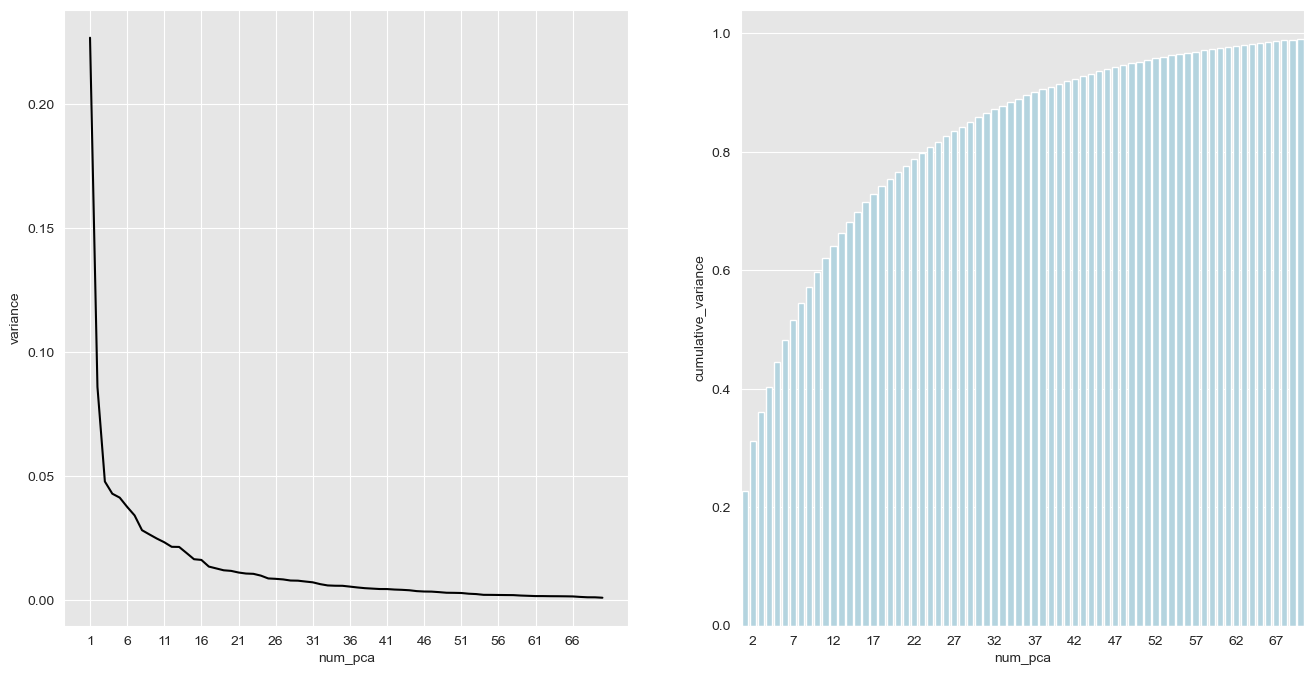

In [75]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply PCA to the dataset
pca = PCA(n_components=70)
X_pca = pca.fit_transform(X_encod)

##analyse the results
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio)

import seaborn as sns
%matplotlib inline

variances = pca.explained_variance_ratio_.tolist()
total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cumulative_variance': total_variance})
scree.head(10)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,70,5)) 
sns.barplot(x="num_pca", y="cumulative_variance", data=scree, ax = ax[1], color = 'lightblue')
ax[1].set_xticks(range(1,70,5))

plt.show()

In [76]:
# Select the top 50 principal components and get the indices of top 50 features 
top_50_components = pca.components_[50:]
top_50_feature_indices = np.argsort(-np.abs(top_50_components), axis=1)[:, :50]

# Get and print the names of Top40 features
top_50_feature_names = X_encod.columns[top_50_feature_indices.flatten()].values.reshape(-1, 50)
print(top_50_feature_names)


[['Race_MULTI-RACIAL' 'Race_UNKNOWN RACE'
  'Number Of Hours Worked Each Week_UNKNOWN EMPLOYMENT HOURS'
  'Race_OTHER' 'Race_WHITE ONLY'
  'Number Of Hours Worked Each Week_01-14 HOURS'
  'Household Composition_HOMELESS' 'Veteran Status_UNKNOWN'
  'Living Situation_UNKNOWN' 'Education Status_PRE-K TO FIFTH GRADE'
  'Other Developmental Disability_YES' 'Intellectual Disability_UNKNOWN'
  'Traumatic Brain Injury_YES' 'Cannabis use_UNKNOWN'
  'Autism Spectrum_YES' 'Age Group_CHILD' 'Cancer_YES'
  'Liver Disease_YES' 'Hearing Impairment_YES'
  'Living Situation_PRIVATE RESIDENCE' 'Education Status_UNKNOWN'
  'Visual Impairment_UNKNOWN' 'Non brain related disorder_YES'
  'Education Status_MIDDLE SCHOOL TO HIGH SCHOOL'
  'Endocrine Condition_YES' 'No Chronic Med Condition_YES'
  'Hearing Impairment_UNKNOWN' 'Other Cardiac_YES'
  'Senses related disorder_UNKNOWN' 'Alzheimer or Dementia_YES'
  'Autism Spectrum_UNKNOWN' 'Household Composition_UNKNOWN'
  'Number Of Hours Worked Each Week_15-34 H

In [80]:
# Select the top 50 principal components and get the indices of top 50 features 
top_50_components = pca.components_[50:]
top_50_feature_indices = np.argsort(-np.abs(top_50_components), axis=1)[:, 50:]

# Get and print the names of the top 50 features
n_features = X_encod.shape[1]
top_50_feature_names = X_encod.columns[top_50_feature_indices.flatten()]
top_50_feature_names = top_50_feature_names[50:]

print(top_50_feature_names)

Index(['Education Status_NO FORMAL EDUCATION', 'Gender_NON-BINARY',
       'Smoke(d)_UNKNOWN', 'Gender_TRANSGENDER FEMALE', 'Pulmonary Asthma_YES',
       'Gender_TRANSGENDER MALE', 'Sexual Orientation_UNKNOWN',
       'Pulmonary Asthma_YES', 'Education Status_MIDDLE SCHOOL TO HIGH SCHOOL',
       'Education Status_NO FORMAL EDUCATION',
       ...
       'Hyperlipidemia_UNKNOWN', 'Neurological Condition_UNKNOWN',
       'Heart Attack_UNKNOWN', 'Gender_MALE', 'Other Cardiac_YES',
       'Hyperlipidemia_YES', 'Household Composition_UNKNOWN',
       'Other Chronic Med Condition_YES', 'Gender_NON-BINARY',
       'Education Status_MIDDLE SCHOOL TO HIGH SCHOOL'],
      dtype='object', length=1070)


In [78]:
lst = list(top_50_feature_names)
lst

['Education Status_NO FORMAL EDUCATION',
 'Gender_NON-BINARY',
 'Smoke(d)_UNKNOWN',
 'Gender_TRANSGENDER FEMALE',
 'Pulmonary Asthma_YES',
 'Gender_TRANSGENDER MALE',
 'Sexual Orientation_UNKNOWN',
 'Pulmonary Asthma_YES',
 'Education Status_MIDDLE SCHOOL TO HIGH SCHOOL',
 'Education Status_NO FORMAL EDUCATION',
 'Cannabis use_YES',
 'Living Situation_PRIVATE RESIDENCE',
 'No Insurance_UNKNOWN',
 'Household Composition_LIVES ALONE',
 'Living Situation_OTHER LIVING SITUATION',
 'Brain related disorder_UNKNOWN',
 'Education Status_PRE-K TO FIFTH GRADE',
 'No Insurance_YES',
 'Religious Preference_SPIRITUAL NOT RELIGIOUS',
 'Diabetes_YES',
 'Living Situation_UNKNOWN',
 'Household Composition_HOMELESS',
 'Speech Impairment_UNKNOWN',
 'Living Situation_INSTITUTIONAL SETTING',
 'Education Status_UNKNOWN',
 'High Blood Pressure_YES',
 'Religious Preference_RELIGIOUS',
 'Employment Status_NON-PAID/VOLUNTEER',
 'Smoke(d)_YES',
 'Serious Mental Illness_UNKNOWN',
 'Gender_MALE',
 'Hyperlipidemia_

In [81]:
lst = ['Education Status_NO FORMAL EDUCATION',
 'Gender_NON-BINARY',
 'Smoke(d)_UNKNOWN',
 'Gender_TRANSGENDER FEMALE',
 'Pulmonary Asthma_YES',
 'Gender_TRANSGENDER MALE',
 'Sexual Orientation_UNKNOWN',
 'Pulmonary Asthma_YES',
 'Education Status_MIDDLE SCHOOL TO HIGH SCHOOL',
 'Education Status_NO FORMAL EDUCATION',
 'Cannabis use_YES',
 'Living Situation_PRIVATE RESIDENCE',
 'No Insurance_UNKNOWN',
 'Household Composition_LIVES ALONE',
 'Living Situation_OTHER LIVING SITUATION',
 'Brain related disorder_UNKNOWN',
 'Education Status_PRE-K TO FIFTH GRADE',
 'No Insurance_YES',
 'Religious Preference_SPIRITUAL NOT RELIGIOUS',
 'Diabetes_YES',
 'Living Situation_UNKNOWN',
 'Household Composition_HOMELESS',
 'Speech Impairment_UNKNOWN',
 'Living Situation_INSTITUTIONAL SETTING',
 'Education Status_UNKNOWN',
 'High Blood Pressure_YES',
 'Religious Preference_RELIGIOUS',
 'Employment Status_NON-PAID/VOLUNTEER',
 'Smoke(d)_YES',
 'Serious Mental Illness_UNKNOWN',
 'Gender_MALE',
 'Hyperlipidemia_UNKNOWN',
 'High Blood Pressure_UNKNOWN',
 'Obesity_UNKNOWN',
 'Liver Disease_UNKNOWN',
 'Neurological Condition_UNKNOWN',
 'Traumatic Brain Injury_UNKNOWN',
 'Joint Disease_UNKNOWN',
 'Cancer_UNKNOWN',
 'Unknown Chronic Med Condition_YES',
 'Other Chronic Med Condition_UNKNOWN',
 'No Chronic Med Condition_UNKNOWN']

In [85]:
# Create a new list to store the cleaned names
unique_list = set()
cleaned_list = []

# Loop through each name in the original list and remove the "_UNKNOWN" suffix from the name
for name in lst:
    parts = name.split("_")
    name = parts[0]
    if name not in unique_list:
        unique_list.add(name)
        cleaned_list.append(name)

# Print the cleaned list
print(cleaned_list)
len(cleaned_list)

['Education Status', 'Gender', 'Smoke(d)', 'Pulmonary Asthma', 'Sexual Orientation', 'Cannabis use', 'Living Situation', 'No Insurance', 'Household Composition', 'Brain related disorder', 'Religious Preference', 'Diabetes', 'Speech Impairment', 'High Blood Pressure', 'Employment Status', 'Serious Mental Illness', 'Hyperlipidemia', 'Obesity', 'Liver Disease', 'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease', 'Cancer', 'Unknown Chronic Med Condition', 'Other Chronic Med Condition', 'No Chronic Med Condition']


26

## PCA for visualization in unsupervised learning

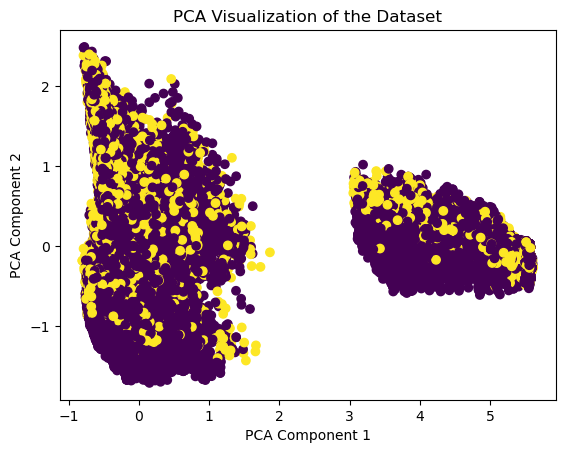

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate a random dataset with 4 features and 1000 samples
#X, y = make_blobs(data_encod, random_state=42)

# Perform PCA on the dataset to reduce its dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encod)

# Plot the dataset with the first two PCA components as the x and y axes
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encod)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of the Dataset')
plt.show()